# Lesson 04
# Peter Lorenz

## 0. Preliminaries
Import the required libraries:

In [104]:
import numpy as np
import pandas as pd

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mutual_info_score

import matplotlib as mpl
import matplotlib.pyplot as plt

Set some global options:

In [19]:
# Display plots inline
%matplotlib inline

# Display multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Suppress scientific notation
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Declare constants:

In [71]:
# Number of bins for computing mutual information score
MI_BINS = 20

Declare utility functions:

In [88]:
# Compute mutual information score between given column and the target variable
def calc_MI(df, target_arr, col):
    c_xy = np.histogram2d(df[col], target_arr, MI_BINS)[0]
    mi = mutual_info_score(None, None, contingency = c_xy)
    
    # Return tuple of column name and MI score vs. target
    return (col, round(mi, 3))

## 1. Read data
We begin by importing our data set:

In [65]:
# Internet location of the data set
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

# Download the data into a dataframe object
crime_data = pd.read_csv(url)

# Add columns
crime_data.columns = ['state', 'county', 'community', 'communityname', 'fold', 'population', 
                      'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 
                      'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 
                      'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 
                      'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 
                      'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 
                      'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 
                      'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 
                      'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 
                      'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 
                      'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 
                      'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
                      'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 
                      'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 
                      'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 
                      'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 
                      'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 
                      'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 
                      'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 
                      'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 
                      'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 
                      'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 
                      'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 
                      'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
                      'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
                      'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
                      'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
                      'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 
                      'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
                      'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

# Display shape
crime_data.shape

# Display initial rows, all columns vertically
with pd.option_context('display.max_rows', None, 'display.max_columns', 128):
    crime_data.head().T

(1993, 128)

,0,1,2,3,4
state,53,24,34,42,6
county,?,?,5,95,?
community,?,?,81440,6096,?
communityname,Tukwilacity,Aberdeentown,Willingborotownship,Bethlehemtownship,SouthPasadenacity
fold,1,1,1,1,1
population,0.000,0.000,0.040,0.010,0.020
householdsize,0.160,0.420,0.770,0.550,0.280
racepctblack,0.120,0.490,1.000,0.020,0.060
racePctWhite,0.740,0.560,0.080,0.950,0.540
racePctAsian,0.450,0.170,0.120,0.090,1.000


### Data Cleaning
Next we clean the data to render it suitable for analysis. First we remove the non-numeric columns used for labeling and set them aside:

In [66]:
# Extract and reserve identifying columns

# Reserve the original data frame
crime_data_orig = crime_data

# Set aside state in an array and drop from data set
state_arr = np.array(crime_data['state'].values)
crime_data = crime_data.drop(['state'], axis=1)

# Set aside county in an array and drop from data set
county_arr = np.array(crime_data['county'].values)
crime_data = crime_data.drop(['county'], axis=1)

# Set aside community in an array and drop from data set
community_arr = np.array(crime_data['community'].values)
crime_data = crime_data.drop(['community'], axis=1)

# Set aside communityname in an array and drop from data set
communityname_arr = np.array(crime_data['communityname'].values)
crime_data = crime_data.drop(['communityname'], axis=1)

# Set aside fold in an array and drop from data set
fold_arr = np.array(crime_data['fold'].values)
crime_data = crime_data.drop(['fold'], axis=1)

Then we impute missing values in the remaining columns and cast the dataframe as float:

In [67]:
# Impute missing values using column median
crime_data = crime_data.replace('?', np.NaN)
crime_data = crime_data.apply(lambda x: x.fillna(x.median()))

# Cast columns to float64
crime_data = crime_data.astype(np.float64)

# Display abbreviated data set
crime_data.head().T

,0,1,2,3,4
population,0.000,0.000,0.040,0.010,0.020
householdsize,0.160,0.420,0.770,0.550,0.280
racepctblack,0.120,0.490,1.000,0.020,0.060
racePctWhite,0.740,0.560,0.080,0.950,0.540
racePctAsian,0.450,0.170,0.120,0.090,1.000
...,...,...,...,...,...
LemasPctPolicOnPatr,0.750,0.750,0.750,0.750,0.750
LemasGangUnitDeploy,0.500,0.500,0.500,0.500,0.500
LemasPctOfficDrugUn,0.000,0.000,0.000,0.000,0.000
PolicBudgPerPop,0.155,0.155,0.155,0.155,0.155


Observe that the missing values have now been replaced with the median for each column.

Finally, we extract and reserve the target variable *ViolentCrimesPerPop*:

In [82]:
# Set aside communityname in an array and drop from data set
target_arr = np.array(crime_data['ViolentCrimesPerPop'].values)
crime_data = crime_data.drop(['ViolentCrimesPerPop'], axis=1)

Now our data set contains only predictor variables and these variables have been cleaned of missing values. We are ready to proceed to feature selection.

## 2. Apply three techniques for feature selection
Here we apply three techniques for feature selection.

### Filter methods
Our first method for feature selection is *Filter methods*. We use the *mutual information score* to assess the correlation of each variable with the target variable *ViolentCrimesPerPop*. We compute *mutual information score* for each column target variable, then sort the scores from greatest to least as follows:

In [89]:
# For each column, apply mutual information computation then sort the results
sorted([calc_MI(crime_data, target_arr, c) for c in crime_data.columns], 
       key=lambda x: x[1],
       reverse=True)

[('PctKids2Par', 0.51),
 ('PctIlleg', 0.475),
 ('PctFam2Par', 0.443),
 ('racePctWhite', 0.413),
 ('PctYoungKids2Par', 0.405),
 ('PctTeen2Par', 0.378),
 ('PctPopUnderPov', 0.353),
 ('pctWInvInc', 0.348),
 ('PctPersDenseHous', 0.347),
 ('pctWPubAsst', 0.339),
 ('racepctblack', 0.335),
 ('FemalePctDiv', 0.335),
 ('TotalPctDiv', 0.331),
 ('PctHousNoPhone', 0.298),
 ('MalePctDivorce', 0.296),
 ('PctPersOwnOccup', 0.296),
 ('PctUnemployed', 0.27),
 ('PctHousOwnOcc', 0.255),
 ('PctHousLess3BR', 0.254),
 ('PctNotHSGrad', 0.243),
 ('PctLess9thGrade', 0.239),
 ('medFamInc', 0.233),
 ('medIncome', 0.22),
 ('NumUnderPov', 0.218),
 ('PctLargHouseFam', 0.217),
 ('PctVacantBoarded', 0.211),
 ('racePctHisp', 0.205),
 ('HousVacant', 0.202),
 ('NumIlleg', 0.2),
 ('blackPerCap', 0.188),
 ('perCapInc', 0.18),
 ('PctWOFullPlumb', 0.18),
 ('PctOccupMgmtProf', 0.174),
 ('PctHousOccup', 0.173),
 ('RacialMatchCommPol', 0.173),
 ('PctNotSpeakEnglWell', 0.166),
 ('PctLargHouseOccup', 0.166),
 ('PctPolicWhite', 0

We find the variables listed according to their shared information with the target. For example, the percentage of kids in family housing with two parents (*PctKids2Par*) is found to be the variable with the highest shared information with the target with a *mutual information score* of 0.51. The top 5 features based on mutual information score are:
1. PctKids2Par
1. PctIlleg
1. PctFam2Par
1. racePctWhite
1. PctYoungKids2Par

### Wrapper methods
Our second method for feature selection is *Wrapper methods*. We apply 2 methods: *backward selection* and *forward_selection*:

#### Backward Selection
In backward selection, we start with all features and progressively remove the least helpful features until left with a subset of features that represents the best predictors of the target variable:

In [91]:
# Perform linear regression on a successively smaller subset of features, pruning less predictive features
estimator = LinearRegression()
back_selector = RFE(estimator, 5, step = 1, verbose = True) # select 5 features, removing 1 feature at a time
back_selector = back_selector.fit(crime_data, target_arr)

Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitti

We now list the features selected by backward selection:

In [93]:
# List selected features
crime_data.columns[back_selector.support_]

Index(['numbUrban', 'MalePctDivorce', 'TotalPctDiv', 'LemasSwFTPerPop',
       'PolicPerPop'],
      dtype='object')

Remarkably, none of the 5 features chosen by backward selection is in our list of top 5 features by mutual information. One possible explanation is that linear regression is not the best model to apply to our data set. Given these conflicting results, it is clear we require additional information to determine which features are in fact the best features for our model.

We now test the accuracy of our subset of features by running the model with the subset of features:

In [97]:
# Run the model against the select subset of features to obtain predictions
yhat_backward = back_selector.predict(crime_data)

For comparison, we train the estimator on the data set with the full set of features:

In [100]:
estimator = estimator.fit(crime_data, target_arr)
yhat_estimator = estimator.predict(crime_data)

To compare the models, we look at the correlation matrix between the respective estimators:

In [101]:
np.corrcoef([yhat_backward, yhat_estimator, target_arr])

array([[1.   , 0.734, 0.614],
       [0.734, 1.   , 0.837],
       [0.614, 0.837, 1.   ]])

The model based on the full set of features (0.84 correlation with target) outperforms the model based on the limited set of 5 features (0.61 correlation with target). One reason could be that 5 features is not the optimal number of features to retain in the reduced feature set.

#### Forward Selection
In forward selection, we start with a single feature and progressively add the most helpful features until we have a subset of features that (again) represents the best predictors of the target variable.

In [103]:
# Perform linear regression on a successively larger subset of features, adding most predictive features
estimator = LinearRegression()

stepwise_selector = SFS(estimator, 
    k_features = "parsimonious", 
    forward = True, 
    floating = False, 
    scoring = 'neg_mean_squared_error', 
    cv = 10)

stepwise_selector = stepwise_selector.fit(crime_data.values, target_arr)

Now plot model performance for each subset of features:

Text(0.5, 1.0, 'Sequential selection (w. StdErr)')

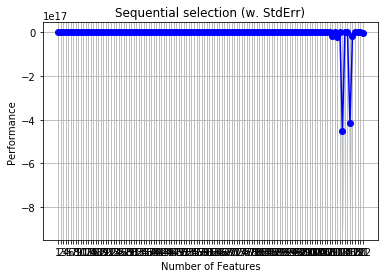

In [105]:
# Plot model performance at each increment
# WARNING: This can take a long time!
fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err')
plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

The graph shows no change in the performance of the model as the number of features increases. The performance degrades for 2 features in particular and slightly degrades as we approach the full features set. But it is hard to believe that the model with a single good feature performs as well as the model with five good features, suggesting that more work is necessary to determine a practical subset of features to retain in our model.

### Embedded methods
Our third method for feature selection is *Embedded methods*.

## 3. Describe your findings
In this assignment we found that ...